In [1]:
import cv2
import numpy
import mss
import matplotlib.pyplot as plt
import pytesseract
import numpy as np

from copy import copy

In [2]:
MONITOR = {"top": 284, "left": 0, "width": 770, "height": 500}
BOTTOM_LEFT_WINDOW = {"top": 540, "left": 0, "width": 770, "height": 505}
PICS_DIR = "../pics/"

In [3]:
def get_screenshot(monitor=MONITOR):
    with mss.mss() as screenshot:
        return numpy.array(screenshot.grab(monitor))

def read_image(filename):
    return cv2.imread(PICS_DIR+filename, cv2.IMREAD_COLOR)
    
    
def show_image(*var_images, size="small"):
    """ Displays all images side by side.
    """
    if size == "small":
        figsize = (5, 5)
    elif size == "medium":
        figsize = (8, 8)
    elif size == "large":
        figsize = (12, 12)
    
    rgb_images = []
    for an_image in var_images:
        an_image = cv2.cvtColor(an_image, cv2.COLOR_BGRA2RGB)
        rgb_images.append(an_image)
    
    NUM_ROWS = 1
    IMGs_IN_ROW = len(rgb_images)
      
    #  Note to self: global image size setting:
    # plt.rcParams["figure.figsize"] = (20, 10)
    f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=figsize)

    if len(rgb_images) == 1:
        ax.imshow(rgb_images[0])
    else:
        for i, rgb in enumerate(rgb_images):
            ax[i].imshow(rgb)
    
    plt.tight_layout()
    plt.show()

In [4]:
def get_matches_on_screen(screenshot, image, threshold=0.85):
    result = cv2.matchTemplate(screenshot, image, cv2.TM_CCOEFF_NORMED)
    h, w = image.shape[:2]
    matching_points = numpy.where(result >= threshold)
    all_matches = zip(*matching_points[::-1])

    rect_matches = []
    for top_left_match in list(all_matches):
        bottom_right_match = (top_left_match[0] + w, top_left_match[1] + h)
        rect_matches.append((top_left_match, bottom_right_match))
        
    return rect_matches    
    
def debug_rectangle(image, top_left, bottom_right):
    cv2.rectangle(
        image,
        top_left,
        bottom_right,
        [255, 0, 255],
        2,
    )

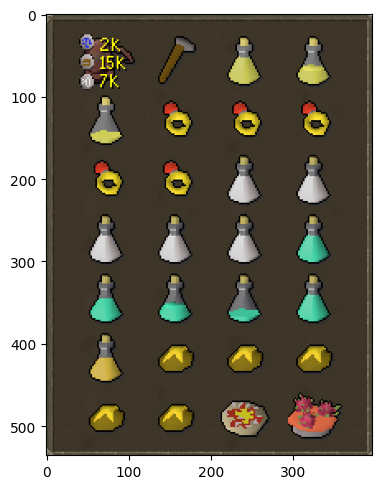

In [4]:
inventory = read_image("example_inventory.png")
show_image(inventory, size="small")

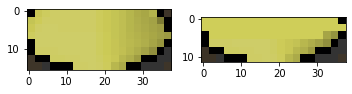

In [6]:
two_dose_brew = read_image("bottom_of_sara_brew.png")
single_dose_brew = read_image("single_dose_sara_brew.png")

show_image(two_dose_brew, single_dose_brew)

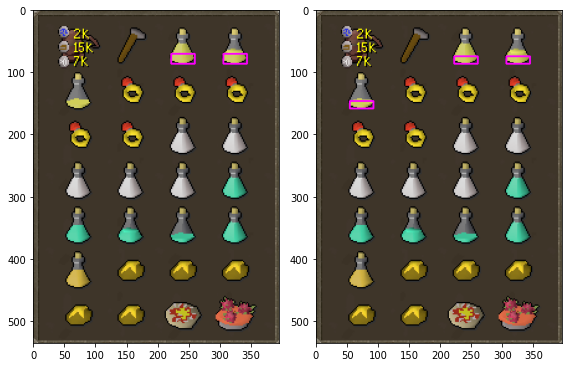

In [7]:
two_dose_brew_inventory = copy(inventory)
# Lower than .98 matches the defense potion, too.
for match in get_matches_on_screen(inventory, two_dose_brew, threshold=0.98):
    debug_rectangle(two_dose_brew_inventory, match[0], match[1])

one_dose_brew_inventory = copy(inventory)
# Lower than .96 matches the defense potion, too.
for match in get_matches_on_screen(inventory, single_dose_brew, threshold=0.96):
    debug_rectangle(one_dose_brew_inventory, match[0], match[1])
    
show_image(two_dose_brew_inventory, one_dose_brew_inventory, size="medium")

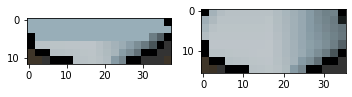

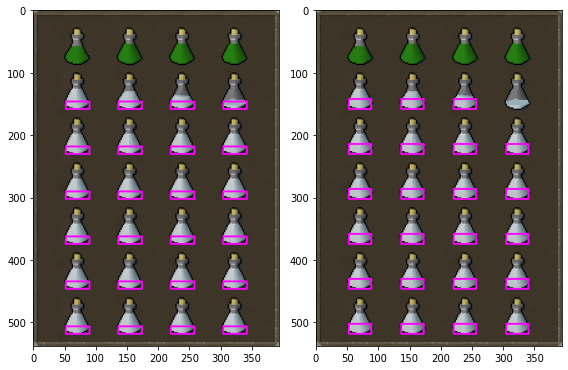

In [23]:
inventory = read_image("example_inventory_overloads.png")
one_dose_overload = read_image("overload_1_dose.png")
two_dose_overload = read_image("overload_2_dose.png")



one_dose_overload_inventory = copy(inventory)
# Lower than .96 matches the defense potion, too.
for match in get_matches_on_screen(inventory, one_dose_overload, threshold=0.90):
    debug_rectangle(one_dose_overload_inventory, match[0], match[1])

two_dose_overload_inventory = copy(inventory)
# Lower than .98 matches the defense potion, too.
for match in get_matches_on_screen(inventory, two_dose_overload, threshold=0.90):
    debug_rectangle(two_dose_overload_inventory, match[0], match[1])


    
show_image(one_dose_overload, two_dose_overload, size="small")
show_image(one_dose_overload_inventory, two_dose_overload_inventory, size="medium")